<a href="https://colab.research.google.com/github/deliabel/CodeDivisionWorksheets/blob/main/Air_Quality_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clean and wrangle air quality data

The following data file contains data collected at a roadside monitoring station.  You can see the data in a spreadsheet here: https://docs.google.com/spreadsheets/d/1XpAvrpuyMsKDO76EZ3kxuddBOu7cZX1Od4uEts14zco/edit?usp=sharing

The data contains:
* a heading line (Chatham Roadside) which needs to be skipped
* dates which are sometimes left- and sometimes right-justified indicating that they are not formatted as dates, rather they are text (so need to be converted to dates)
* times which are not all in the same format
* Nitrogen Dioxide levels which are, again, text and sometimes contain nodata
* Status which is always the same





### Project - clean, sort and wrangle the data

Read the dataset into a dataframe, skipping the first row   
Convert dates to date format  
Remove rows with nodata in the Nitrogen dioxide column  
Convert the Nitrogen dioxide levels values to float type  
Sort by Nitrogen dioxide level  
Create a new column for 'Weekdays' (use df['Date'].dt.weekday)  
Rename the column Nitrogen dioxide level to NO2 Level (V ug/m2)  
Remove the Status column  

The dataset can be viewed here:  https://drive.google.com/file/d/1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ/view?usp=sharing  and the data accessed here: https://drive.google.com/uc?id=1SOe9b4VJ1FCtDVgZ2T8d00-jTw2Kux1i  This is a .csv file  


### Cleaning the data

Using the guidence provided as a starting point, the data was made more useable by:
* Skipping the first row in the raw dataset as it was read in, to remove a title row.
* Converting the 'Dates' column values from object type to a datetime type.
* Replacing the midnight values in the 'Time' column to match the format of the other values and to use the standard 00:00 instead of 24:00.
** Removing the rows without a measurment (value is 'nodata') from the 'Nitrogen Dioxide' column.
** or converting the 'nodata' values in the 'Nitrogen Dioxide' column to none, to allow the column data type to be changed with these rows in place.
* Converting the 'Nitrogen Dioxide' column values from object type to a float type.
* Renaming the 'Nitrogen Dioxide' column to 'NO2 levels (V µg/m3)' to better describe the measurements and to allow the 'Status' column to be removed.
* Removing the unnecessary 'Status' column.
* Adding a 'Weekdays' column to label the rows by day of the week.
* * Adding a 'Months' or 'Week' if possible column to label the rows by month.



In [111]:
import pandas as pd

In [112]:
# Reads the dataset into a dataframe, skipping the first row
# Output gives an idea of the dataset
url2020 = 'https://raw.githubusercontent.com/deliabel/CodeDivisionWorksheets/main/data%20sets/NO2-measured-data-2020-2021-Chatham-Roadside.csv'
measured_20df = pd.read_csv(url2020, skiprows = 1)
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,01/01/2020,1:00,41.07113,V µg/m³
1,01/01/2020,2:00,38.9604,V µg/m³
2,01/01/2020,3:00,35.12313,V µg/m³
3,01/01/2020,4:00,35.85312,V µg/m³
4,01/01/2020,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,31/12/2020,20:00,24.4694,V µg/m³
8780,31/12/2020,21:00,22.62313,V µg/m³
8781,31/12/2020,22:00,20.3186,V µg/m³
8782,31/12/2020,23:00,21.47177,V µg/m³


In [113]:
# (extra: this is to check if any columns have null data, and to find out which type of data is in each column)
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8784 non-null   object
 1   Time              8784 non-null   object
 2   Nitrogen dioxide  8784 non-null   object
 3   Status            8784 non-null   object
dtypes: object(4)
memory usage: 274.6+ KB


In [114]:
# Converts values in 'Date' column to date format
# Output shows the 'Date' datatype has changed to datetime64
measured_20df['Date']= pd.to_datetime(measured_20df['Date'], dayfirst = True)
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8784 non-null   datetime64[ns]
 1   Time              8784 non-null   object        
 2   Nitrogen dioxide  8784 non-null   object        
 3   Status            8784 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 274.6+ KB


In [115]:
# additional: replaces midnight time, making the format match the rest
# output shows the last midnight time is now 00:00
measured_20df = measured_20df.replace('24:00:00', '00:00')
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.9604,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³
3,2020-01-01,4:00,35.85312,V µg/m³
4,2020-01-01,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,2020-12-31,20:00,24.4694,V µg/m³
8780,2020-12-31,21:00,22.62313,V µg/m³
8781,2020-12-31,22:00,20.3186,V µg/m³
8782,2020-12-31,23:00,21.47177,V µg/m³


In [116]:
# Removes rows with nodata in the 'Nitrogen dioxide' column
# Output shows that the indices have not changed, but there are now fewer rows
measured_20df = measured_20df.loc[measured_20df['Nitrogen dioxide'] != 'nodata']
measured_20df

,Date,Time,Nitrogen dioxide,Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.9604,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³
3,2020-01-01,4:00,35.85312,V µg/m³
4,2020-01-01,5:00,32.10503,V µg/m³
...,...,...,...,...
8779,2020-12-31,20:00,24.4694,V µg/m³
8780,2020-12-31,21:00,22.62313,V µg/m³
8781,2020-12-31,22:00,20.3186,V µg/m³
8782,2020-12-31,23:00,21.47177,V µg/m³


In [117]:
# (extra: checks there are no nodata rows left) <--- remove later?
# (as a second check, if this is run first, there are 152 rows: 8784 - 152 = 8632, which is the new length of the df)
measured_20df_check = measured_20df[measured_20df['Nitrogen dioxide'] == 'nodata']
measured_20df_check

,Date,Time,Nitrogen dioxide,Status


In [118]:
# additional: replaces 'nodata' with None, might help with plots, will introduce nulls
# Output shows there are now null values in the 'Nitrogen dioxide' column, and a section where 'nodata' has been replaced with None
#measured_20df = measured_20df.replace('nodata', None)
#print(measured_20df.info())
#measured_20df.iloc[50:60]

In [119]:
# Converts the 'Nitrogen dioxide' values to float type
# Output shows 'Nitrogen dioxide' datatype has changed to float64
measured_20df = measured_20df.astype({'Nitrogen dioxide': float,})
measured_20df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8632 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8632 non-null   datetime64[ns]
 1   Time              8632 non-null   object        
 2   Nitrogen dioxide  8632 non-null   float64       
 3   Status            8632 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 337.2+ KB


In [120]:
# Renames the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m3)'
measured_20df = measured_20df.rename({'Nitrogen dioxide': "NO2 Level (V ug/m3)"}, axis="columns")
measured_20df.head(3)

,Date,Time,NO2 Level (V ug/m3),Status
0,2020-01-01,1:00,41.07113,V µg/m³
1,2020-01-01,2:00,38.96040,V µg/m³
2,2020-01-01,3:00,35.12313,V µg/m³


In [121]:
# Removes the 'Status' column
measured_20df = measured_20df.drop('Status', axis = 1)
measured_20df

,Date,Time,NO2 Level (V ug/m3)
0,2020-01-01,1:00,41.07113
1,2020-01-01,2:00,38.96040
2,2020-01-01,3:00,35.12313
3,2020-01-01,4:00,35.85312
4,2020-01-01,5:00,32.10503
...,...,...,...
8779,2020-12-31,20:00,24.46940
8780,2020-12-31,21:00,22.62313
8781,2020-12-31,22:00,20.31860
8782,2020-12-31,23:00,21.47177


In [122]:
# Creates a new 'Weekdays' column to label days of the week
measured_20df.insert(1, 'Weekdays', measured_20df['Date'].dt.weekday)
measured_20df.head(3)

,Date,Weekdays,Time,NO2 Level (V ug/m3)
0,2020-01-01,2,1:00,41.07113
1,2020-01-01,2,2:00,38.96040
2,2020-01-01,2,3:00,35.12313


In [123]:
# (extra: checks that there are labels for 7 days, and that all the days are included: Monday is 0 and Sunday is 6)
measured_20df['Weekdays'].unique()

array([2, 3, 4, 5, 6, 0, 1])

### Expand the dataset
---

There is a second data set here covering the year 2021:  https://drive.google.com/uc?id=1aYmBf9il2dWA-EROvbYRCZ1rU2t7JwvJ  

Concatenate the two datasets to expand it to 2020 and 2021.  

Before you can concatenate the datasets you will need to clean and wrangle the second dataset in the same way as the first.  Use the code cell below.  Give the second dataset a different name.

### Cleaning the second dataset

The second dataset was cleaned in the same way.

In [124]:
# Reads the dataset into a dataframe, skipping the first row
url2021 = 'https://raw.githubusercontent.com/deliabel/CodeDivisionWorksheets/main/data%20sets/NO2-measured-data-2021-2022-Chatham-Roadside.csv'
measured_21df = pd.read_csv(url2021, skiprows = 1)
measured_21df

,Date,Time,Nitrogen dioxide,Status
0,01/01/2021,01:00,16.58269,V µg/m³
1,01/01/2021,02:00,14.00478,V µg/m³
2,01/01/2021,03:00,15.35208,V µg/m³
3,01/01/2021,04:00,13.49688,V µg/m³
4,01/01/2021,05:00,12.47511,V µg/m³
...,...,...,...,...
8755,31/12/2021,20:00,12.51492,P µg/m³
8756,31/12/2021,21:00,14.00046,P µg/m³
8757,31/12/2021,22:00,10.04780,P µg/m³
8758,31/12/2021,23:00,3.49557,P µg/m³


In [125]:
# (extra: this is to check if any columns have null data, and to find out which type of data is in each column)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              8760 non-null   object
 1   Time              8760 non-null   object
 2   Nitrogen dioxide  8760 non-null   object
 3   Status            8760 non-null   object
dtypes: object(4)
memory usage: 273.9+ KB


In [126]:
# Converts values in 'Date' column to date format
measured_21df['Date']= pd.to_datetime(measured_21df['Date'], dayfirst = True)
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8760 non-null   datetime64[ns]
 1   Time              8760 non-null   object        
 2   Nitrogen dioxide  8760 non-null   object        
 3   Status            8760 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 273.9+ KB


In [127]:
# additional: replaces midnight time, making the format match the rest
measured_21df = measured_21df.replace('24:00', '00:00')
measured_21df.tail(26)

,Date,Time,Nitrogen dioxide,Status
8734,2021-12-30,23:00,4.47334,P µg/m³
8735,2021-12-30,00:00,1.35644,P µg/m³
8736,2021-12-31,01:00,1.23356,P µg/m³
8737,2021-12-31,02:00,0.03299,P µg/m³
8738,2021-12-31,03:00,0.20081,P µg/m³
8739,2021-12-31,04:00,0.08654,P µg/m³
8740,2021-12-31,05:00,0.81281,P µg/m³
8741,2021-12-31,06:00,2.15443,P µg/m³
8742,2021-12-31,07:00,2.41979,P µg/m³
8743,2021-12-31,08:00,5.44393,P µg/m³


In [128]:
# Removes rows with nodata in the 'Nitrogen dioxide' column
# measured_21df = measured_21df.loc[measured_21df['Nitrogen dioxide'] != 'nodata']
measured_21df = measured_21df[measured_21df['Nitrogen dioxide'] != 'nodata']
measured_21df

,Date,Time,Nitrogen dioxide,Status
0,2021-01-01,01:00,16.58269,V µg/m³
1,2021-01-01,02:00,14.00478,V µg/m³
2,2021-01-01,03:00,15.35208,V µg/m³
3,2021-01-01,04:00,13.49688,V µg/m³
4,2021-01-01,05:00,12.47511,V µg/m³
...,...,...,...,...
8755,2021-12-31,20:00,12.51492,P µg/m³
8756,2021-12-31,21:00,14.00046,P µg/m³
8757,2021-12-31,22:00,10.04780,P µg/m³
8758,2021-12-31,23:00,3.49557,P µg/m³


In [129]:
# (extra: checking there are no nodata rows left) <--- remove later?
measured_21df_check = measured_21df[measured_21df['Nitrogen dioxide'] == 'nodata']
measured_21df_check

,Date,Time,Nitrogen dioxide,Status


In [130]:
# additional: replaces 'nodata' with None, might help with plots, will introduce nulls
#measured_21df = measured_21df.replace('nodata', None)
#measured_21df.info()

In [131]:
# Converts the 'Nitrogen dioxide' values to float type
measured_21df = measured_21df.astype({'Nitrogen dioxide': float,})
measured_21df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8680 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              8680 non-null   datetime64[ns]
 1   Time              8680 non-null   object        
 2   Nitrogen dioxide  8680 non-null   float64       
 3   Status            8680 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 339.1+ KB


In [132]:
# Renames the column 'Nitrogen dioxide' to 'NO2 Level (V ug/m3)'
measured_21df = measured_21df.rename({'Nitrogen dioxide': "NO2 Level (V ug/m3)"}, axis="columns")
measured_21df.head(3)

,Date,Time,NO2 Level (V ug/m3),Status
0,2021-01-01,01:00,16.58269,V µg/m³
1,2021-01-01,02:00,14.00478,V µg/m³
2,2021-01-01,03:00,15.35208,V µg/m³


In [133]:
# Removes the 'Status' column
measured_21df = measured_21df.drop('Status', axis = 1) # what do these negative values mean? there are 9.
measured_21df

,Date,Time,NO2 Level (V ug/m3)
0,2021-01-01,01:00,16.58269
1,2021-01-01,02:00,14.00478
2,2021-01-01,03:00,15.35208
3,2021-01-01,04:00,13.49688
4,2021-01-01,05:00,12.47511
...,...,...,...
8755,2021-12-31,20:00,12.51492
8756,2021-12-31,21:00,14.00046
8757,2021-12-31,22:00,10.04780
8758,2021-12-31,23:00,3.49557


In [134]:
# Creates a new 'Weekdays' column to label days of the week
measured_21df.insert(1, 'Weekdays', measured_21df['Date'].dt.weekday)
measured_21df.head(3)

,Date,Weekdays,Time,NO2 Level (V ug/m3)
0,2021-01-01,4,01:00,16.58269
1,2021-01-01,4,02:00,14.00478
2,2021-01-01,4,03:00,15.35208


In [135]:
# (extra: checks that there are labels for 7 days, and that all the days are included: monday is 0 and sunday is 6)
measured_21df['Weekdays'].unique()

array([4, 5, 6, 0, 1, 2, 3])

#### *end of cleaning*
---


In [136]:
# Concatenates the two datasets to expand it to 2020 and 2021.
# Output shows the new length of the dataframe
measuredNO2_df = pd.concat([measured_20df, measured_21df], ignore_index = True)
print('shape:', measuredNO2_df.shape)
measuredNO2_df

shape: (17312, 4)


,Date,Weekdays,Time,NO2 Level (V ug/m3)
0,2020-01-01,2,1:00,41.07113
1,2020-01-01,2,2:00,38.96040
2,2020-01-01,2,3:00,35.12313
3,2020-01-01,2,4:00,35.85312
4,2020-01-01,2,5:00,32.10503
...,...,...,...,...
17307,2021-12-31,4,20:00,12.51492
17308,2021-12-31,4,21:00,14.00046
17309,2021-12-31,4,22:00,10.04780
17310,2021-12-31,4,23:00,3.49557


In [137]:
import matplotlib.pyplot as plt

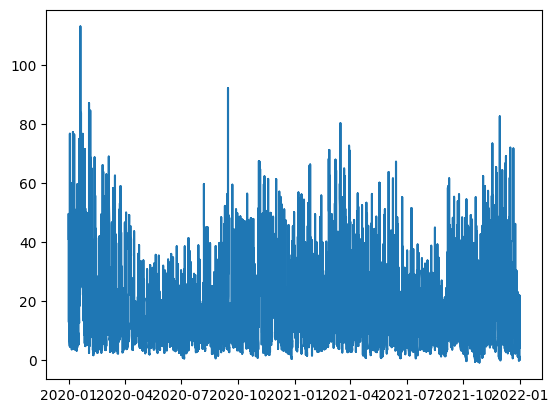

In [138]:
# (extra: seeing what the data looks like, getting an idea of patterns)
x_dates = measuredNO2_df['Date']
y_NO2 = measuredNO2_df['NO2 Level (V ug/m3)']
plt.plot(x_dates, y_NO2)
plt.show()
# plot needs to be longer and have months as labels, but still have points for each week or day, at least
# there might be a difference between summer and winter

### Show summary statistics for larger dataset
---

After the datasets have been concatenated, group the data by Weekdays and show summary statistics by day of the week.

In [139]:
# Displays a summary of statistics for the measured nitrogen dioxide levels
measuredNO2_df[["NO2 Level (V ug/m3)"]].describe() # negative value?

,NO2 Level (V ug/m3)
count,17312.000000
mean,18.590636
std,12.793750
min,-0.777430
25%,9.020180
50%,15.433880
75%,24.919745
max,113.061890


In [140]:
# groups the data by Weekdays and shows summary statistics by day of the week
measuredNO2_df.groupby('Weekdays')['NO2 Level (V ug/m3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekdays,,,,,,,,
0,2452.0,19.019897,13.566948,0.58930,8.944637,15.91839,26.016740,113.06189
1,2434.0,19.862832,13.623132,-0.10519,9.677307,16.66992,27.045835,92.13063
2,2485.0,21.569402,13.843067,-0.77743,10.894910,18.47115,30.186290,84.55297
3,2483.0,19.822405,12.873919,-0.13101,10.190015,16.82392,26.306000,72.00084
4,2500.0,20.776520,13.236096,0.03299,10.690697,18.00050,28.146380,76.72297
5,2494.0,15.905960,10.595521,0.75690,8.021902,13.60438,20.842495,74.93681
6,2464.0,13.160879,8.851133,-0.41740,6.782293,11.11951,16.998405,58.31275


In [141]:
# Finds mean nitrogen dioxide level by day of the week
meanNO2_days = measuredNO2_df.groupby('Weekdays')['NO2 Level (V ug/m3)'].mean()
meanNO2_days

Weekdays
0    19.019897
1    19.862832
2    21.569402
3    19.822405
4    20.776520
5    15.905960
6    13.160879
Name: NO2 Level (V ug/m3), dtype: float64

In [142]:
# Finds maximum nitrogen dioxide level by day of the week
maxNO2_days = measuredNO2_df.groupby('Weekdays')['NO2 Level (V ug/m3)'].max()
maxNO2_days

Weekdays
0    113.06189
1     92.13063
2     84.55297
3     72.00084
4     76.72297
5     74.93681
6     58.31275
Name: NO2 Level (V ug/m3), dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

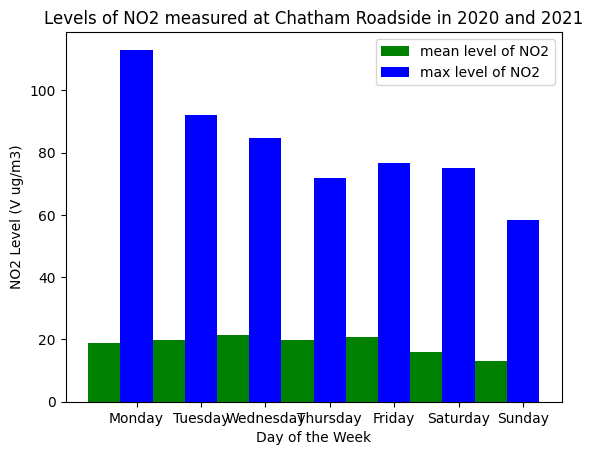

In [143]:
# additional: plots mean and max on a bar chart, to see if there might be a pattern over the week

marks = maxNO2_days.keys() # this will do for now, I need to convert to actual day names
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#labels
#plt.bar(labels, maxNO2_days) #plt.bar(x axis, y axis)
#plt.show()

width = 0.5
fig, ax = plt.subplots()

ax.bar(marks, meanNO2_days, width, color = 'green', label='mean level of NO2')
ax.bar(marks + width, maxNO2_days, width, color='blue', label='max level of NO2')

ax.set(xticks = marks + width, xticklabels = labels,) #xlim=[2*width - 1, len(ind)]) # I found someone's code to do this, I understand most of it, but have not worked out spacing

plt.title('Levels of NO2 measured at Chatham Roadside in 2020 and 2021')
plt.xlabel('Day of the Week')
plt.ylabel('NO2 Level (V ug/m3)')
ax.legend(loc='upper right')

plt.show

## Ideas for statistics

####We have:
*   dates, throughout two entire years(?)
*   times of day (hourly?)
*   measurement of NO2
*   weekdays

####things I can do with just this set:
*   summary statistics
*   should put in a plot, if I can
*   trends over a year: could test summer vs winter, holidays like christmas
*   compare one year to the other
*   trends over a week: weekends vs weekdays
*   trends over a day: school run, rush hour (would need to convert the times too)
**   measurements are during covid on/off lockdowns, so work routines are interupted

####possible tests, would require additional data or to look up dates:
*   remember to exclude special weeks if comparing trends over a week
*   school holidays, other holidays/events?
*   could test NO2 vs lockdown dates?
*   check max NO2 against regulations
*   if there was weather data/ station from the same position, could relate to sunny days vs rainy or if wind speed was relevant

*   check data quality of results

#### possible changes to directed order:
* why order by Nitrogen dioxide? I can't think why this is helpful
* dad says sometimes helpful to include the null data when plotting, so could convert 'nodata' to NAN
* I think I thought of something else before, but I cant remember what it was.


## remember to make copy and then remove notes

plan list:

* make the directed part work * done
* look up how to plot, make a plot * sort of done
* worksheet finished *done
* make a copy to seperate worksheet from new copt to turn into the project <- this evening * done
* save on github and add link * done
** add in: fix plots
* annotate the whole thing: explain what cleaning code does, in one box above, with note in each code box. at end explain what summary statistics and visualisations and questions and why. then a summary/conclusion, with notes about what else could be done, and covid note.
* write up further ideas ^
* save project on github - this point is where it is acceptably finished. <- tomorrow 'end of day'
* then try to add at least one extra idea
* save a copy with notes if nessecary
* tidy up and remove any remaining notes
* save finally
